In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os
PATH = os.getcwd()

In [39]:
df_14l = pd.read_csv(os.path.join(PATH, "dataset_14L.csv"))
df_14l['day'] = pd.to_datetime(df_14l['day'], format='%Y-%m-%d')
df_14l['hour'] = pd.to_datetime(df_14l['hour'], format='%H')
df_14l['datetime'] = df_14l['day'] + df_14l['hour'].apply(lambda x: pd.Timedelta(hours=x.hour))
df_14l.reset_index(drop=True, inplace=True)

In [40]:
df_14r = pd.read_csv(os.path.join(PATH, "dataset_14R.csv"))
df_14r['day'] = pd.to_datetime(df_14r['day'], format='%Y-%m-%d')
df_14r['hour'] = pd.to_datetime(df_14r['hour'], format='%H')
df_14r['datetime'] = df_14r['day'] + df_14r['hour'].apply(lambda x: pd.Timedelta(hours=x.hour))
df_14r.reset_index(drop=True, inplace=True)

In [47]:
ma = 20
shift = 0 - int(ma / 2)

#Hive 14L
df_14l['total_ma'] = df_14l['total'].rolling(ma).mean()
df_14l['total_ma'] = df_14l['total_ma'].shift(shift)
df_14l['ratio_ma'] = df_14l['ratio'].rolling(ma).mean()
df_14l['ratio_ma'] = df_14l['ratio_ma'].shift(shift)
df_14l['workers_avg_ma'] = df_14l['workers_avg'].rolling(ma).mean()
df_14l['workers_avg_ma'] = df_14l['workers_avg_ma'].shift(shift)
df_14l['drones_avg_ma'] = df_14l['drones_avg'].rolling(ma).mean()
df_14l['drones_avg_ma'] = df_14l['drones_avg_ma'].shift(shift)

#Hive 14R
df_14r['total_ma'] = df_14r['total'].rolling(ma).mean()
df_14r['total_ma'] = df_14r['total_ma'].shift(shift)
df_14r['ratio_ma'] = df_14r['ratio'].rolling(ma).mean()
df_14r['ratio_ma'] = df_14r['ratio_ma'].shift(shift)
df_14r['workers_avg_ma'] = df_14r['workers_avg'].rolling(ma).mean()
df_14r['workers_avg_ma'] = df_14r['workers_avg_ma'].shift(shift)
df_14r['drones_avg_ma'] = df_14r['drones_avg'].rolling(ma).mean()
df_14r['drones_avg_ma'] = df_14r['drones_avg_ma'].shift(shift)

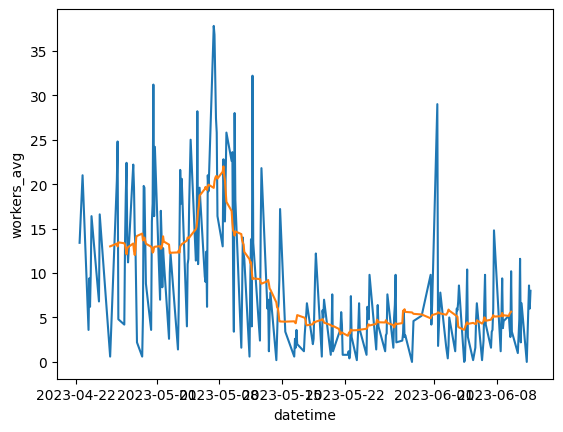

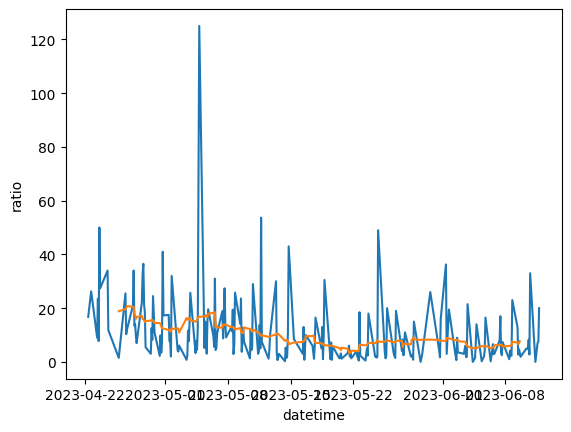

In [48]:
#plot temp
sns.lineplot(x="datetime", y="workers_avg", data=df_14l)
sns.lineplot(x="datetime", y="workers_avg_ma", data=df_14l)
plt.show()

#plot humid
sns.lineplot(x="datetime", y="ratio", data=df_14l)
sns.lineplot(x="datetime", y="ratio_ma", data=df_14l)
plt.show()

In [49]:
df_14l_15h = df_14l[df_14l['hour'] == pd.to_datetime(15, format='%H')]
df_14l_15h.drop(['hour'], axis=1, inplace=True)
df_14r_15h = df_14r[df_14r['hour'] == pd.to_datetime(15, format='%H')]
df_14r_15h.drop(['hour'], axis=1, inplace=True)
df_14l_15h.head()

C:\Users\Thomas\AppData\Local\Temp\ipykernel_27972\184806509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_14l_15h.drop(['hour'], axis=1, inplace=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_27972\184806509.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_14r_15h.drop(['hour'], axis=1, inplace=True)


,hive,day,temp,humid,weight,file_size,workers_avg,drones_avg,total,ratio,workers_array,drones_array,datetime,total_ma,ratio_ma,workers_avg_ma,drones_avg_ma
5,AppMAIS14L,2023-04-23,93.56,50.6,0.0,29277400,10.0,0.2,10.2,50.00,"[9, 9, 11, 10, 11]","[0, 0, 0, 1, 0]",2023-04-23 15:00:00,NaN,NaN,NaN,NaN
8,AppMAIS14L,2023-04-24,88.34,43.8,0.0,49035800,16.6,1.4,18.0,11.86,"[19, 18, 14, 16, 16]","[1, 2, 1, 1, 2]",2023-04-24 15:00:00,NaN,NaN,NaN,NaN
11,AppMAIS14L,2023-04-26,93.56,48.8,0.0,86005013,24.8,2.4,27.2,10.33,"[21, 26, 21, 27, 29]","[2, 3, 2, 3, 2]",2023-04-26 15:00:00,13.82,20.1640,12.99,0.83
16,AppMAIS14L,2023-04-27,100.76,49.1,0.0,66412813,22.4,1.6,24.0,14.00,"[24, 19, 23, 24, 22]","[1, 2, 3, 1, 1]",2023-04-27 15:00:00,12.92,17.3265,12.11,0.81
22,AppMAIS14L,2023-04-28,93.38,47.8,0.0,84000013,12.8,0.6,13.4,21.33,"[14, 8, 7, 11, 24]","[0, 0, 2, 0, 1]",2023-04-28 15:00:00,13.83,15.5320,12.68,1.15


In [51]:
#add column unix to both df
df_14l_15h['unix'] = df_14l_15h['datetime'].apply(lambda x: x.timestamp())
df_14r_15h['unix'] = df_14r_15h['datetime'].apply(lambda x: x.timestamp())

C:\Users\Thomas\AppData\Local\Temp\ipykernel_27972\4033524225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_14l_15h['unix'] = df_14l_15h['datetime'].apply(lambda x: x.timestamp())
C:\Users\Thomas\AppData\Local\Temp\ipykernel_27972\4033524225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_14r_15h['unix'] = df_14r_15h['datetime'].apply(lambda x: x.timestamp())


C:\Users\Thomas\AppData\Local\Temp\ipykernel_27972\1421505936.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_14l_day_no_nan.dropna(inplace=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_27972\1421505936.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_14r_day_no_nan.dropna(inplace=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_27972\1421505936.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([pd.to_datetime(tm, unit='s').strftime('%d/%m') for tm in ax1.get_xticks()])
C:\Users\Thomas\AppData\Local\Temp\ipykernel_27972\1421505936.py:53: UserWa

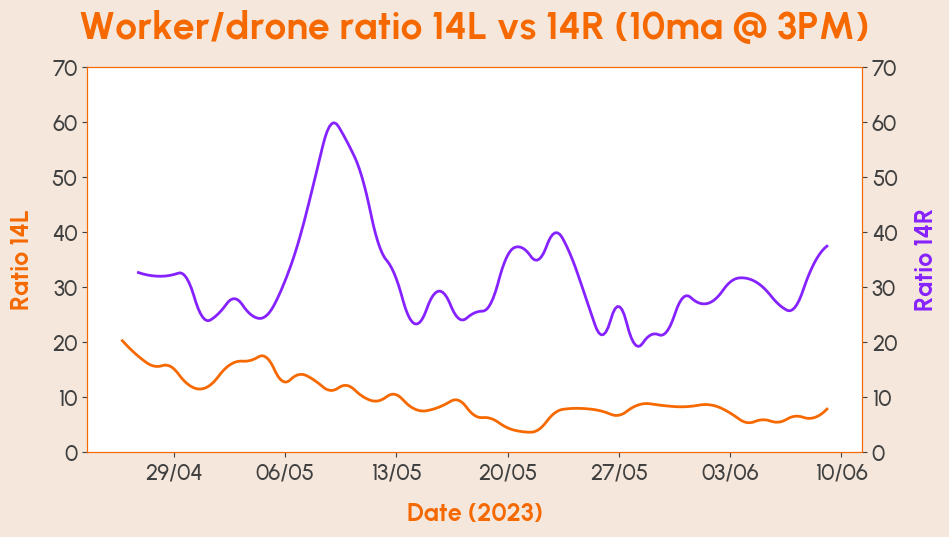

In [56]:
from matplotlib.font_manager import FontProperties
from scipy.interpolate import make_interp_spline
PATH_ASSETS = os.path.join(os.getcwd(), "assets")

primary = ('#F66900', '#F4EBFF')
text = ('#404040', '#F4EBFF')
background = ('#F5E7DC', '#8622ff')
foreground = ( '#FFFFFF', '#8622ff')

# custom fonts
urbanist_medium_font_path = os.path.join(PATH_ASSETS, "Urbanist-Medium.ttf")
urbanist_bold_font_path = os.path.join(PATH_ASSETS, "Urbanist-Bold.ttf")
font_x = FontProperties(fname=urbanist_medium_font_path, size=16)
font_xx = FontProperties(fname=urbanist_bold_font_path, size=18)
font_xxx = FontProperties(fname=urbanist_bold_font_path, size=28)

#drop all columns except unix_time and ratio_ma
df_14l_day_no_nan = df_14l_15h[['unix', 'ratio_ma']]
df_14l_day_no_nan.dropna(inplace=True)
x_14l = df_14l_day_no_nan['unix'].values
y_14l = df_14l_day_no_nan['ratio_ma'].values

#drop all columns except unix_time and ratio_ma
df_14r_day_no_nan = df_14r_15h[['unix', 'ratio_ma']]
df_14r_day_no_nan.dropna(inplace=True)
x_14r = df_14r_day_no_nan['unix'].values
y_14r = df_14r_day_no_nan['ratio_ma'].values

x_ticks_count = 8
mode = 0

fig, ax1 = plt.subplots(figsize=(10, 5))

# smoothing
x_new = np.linspace(df_14l_day_no_nan['unix'].min(), df_14l_day_no_nan['unix'].max(), 300)
spl = make_interp_spline(x_14l, y_14l, k=2)
y_smooth = spl(x_new)
ax1.plot(x_new, y_smooth, color='#F66900', linewidth=2)
ax1.xaxis.set_major_locator(plt.MaxNLocator(x_ticks_count))
ax1.set_xticklabels([pd.to_datetime(tm, unit='s').strftime('%d/%m') for tm in ax1.get_xticks()])
ax1.set_ylabel('Ratio 14L', fontproperties=font_x, labelpad=12.0)
ax1.set_ylim(0, 70)

# title fonts
ax1.set_xlabel(ax1.get_xlabel(), fontproperties=font_xx, labelpad=12.0)
ax1.set_ylabel(ax1.get_ylabel(), fontproperties=font_xx, labelpad=12.0)
ax1.set_title(ax1.get_title(), fontproperties=font_xxx, pad=20.0)
# title colors
ax1.xaxis.label.set_color(primary[mode])
ax1.yaxis.label.set_color('#F66900')
ax1.title.set_color(primary[mode])
# tick fonts
ax1.set_xticklabels(ax1.get_xticklabels(), fontproperties=font_x)
ax1.set_yticklabels(ax1.get_yticklabels(), fontproperties=font_x)
# tick colors
ax1.tick_params(axis='x', colors=text[mode])
ax1.tick_params(axis='y', colors=text[mode])
# background colors
fig.patch.set_facecolor(background[mode])
ax1.set_facecolor(foreground[mode])
# spine colors
ax1.spines['bottom'].set_color(primary[mode])
ax1.spines['left'].set_color(primary[mode])
ax1.spines['top'].set_color(primary[mode])
ax1.spines['right'].set_color(primary[mode])

# smoothing
ax2 = plt.twinx()
x_new = np.linspace(df_14r_day_no_nan['unix'].min(), df_14r_day_no_nan['unix'].max(), 300)
spl = make_interp_spline(x_14r, y_14r, k=2)
y_smooth = spl(x_new)
ax2.plot(x_new, y_smooth, color='#8622FF', linewidth=2)
ax2.xaxis.set_major_locator(plt.MaxNLocator(x_ticks_count))
ax2.set_xticklabels([pd.to_datetime(tm, unit='s').strftime('%d/%m') for tm in ax2.get_xticks()])
ax2.set_ylabel('Ratio 14R', fontproperties=font_x, labelpad=12.0)
ax2.set_ylim(0, 70)

# title fonts
ax2.set_xlabel(ax2.get_xlabel(), fontproperties=font_xx, labelpad=12.0)
ax2.set_ylabel(ax2.get_ylabel(), fontproperties=font_xx, labelpad=12.0)
ax2.set_title(ax1.get_title(), fontproperties=font_xxx, pad=20.0)
# title colors
ax2.xaxis.label.set_color(primary[mode])
ax2.yaxis.label.set_color('#8622FF')
ax2.title.set_color(primary[mode])
# tick fonts
ax2.set_xticklabels(ax2.get_xticklabels(), fontproperties=font_x)
ax2.set_yticklabels(ax2.get_yticklabels(), fontproperties=font_x)
# tick colors
ax2.tick_params(axis='x', colors=text[mode])
ax2.tick_params(axis='y', colors=text[mode])
# background colors
fig.patch.set_facecolor(background[mode])
ax1.set_facecolor(foreground[mode])
# spine colors
ax2.spines['bottom'].set_color(primary[mode])
ax2.spines['left'].set_color(primary[mode])
ax2.spines['top'].set_color(primary[mode])
ax2.spines['right'].set_color(primary[mode])


#reset Y axis ticks
ax1.set_xlabel("Date (2023)")
plt.title("Worker/drone ratio 14L vs 14R (10ma @ 3PM)", fontproperties=font_xxx, pad=20.0)
plt.show()

#save image
fig.set_size_inches(10, 6)
fig.tight_layout()
fig.savefig("ratio_14l_14r.png", dpi=300)

C:\Users\Thomas\AppData\Local\Temp\ipykernel_27972\538880571.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7r_no_nan.dropna(inplace=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_27972\538880571.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([pd.to_datetime(tm, unit='s').strftime('%d/%m') for tm in ax1.get_xticks()])
C:\Users\Thomas\AppData\Local\Temp\ipykernel_27972\538880571.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), fontproperties=font_x)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_27972\538880571.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), fontproperties=font_x)
C

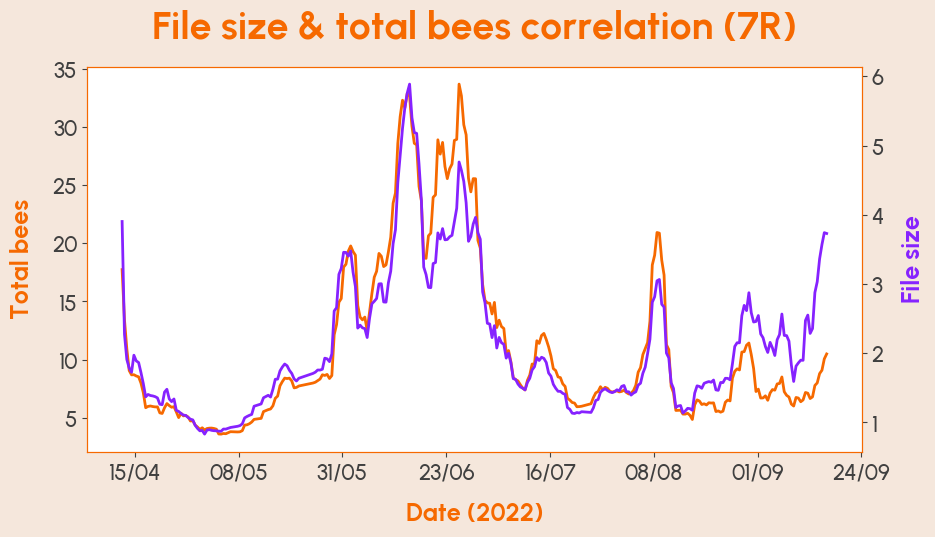

In [59]:
df_7r = pd.read_csv(os.path.join(PATH, "dataset_7R.csv"))
df_7r['day'] = pd.to_datetime(df_7r['day'], format='%Y-%m-%d')
df_7r['hour'] = pd.to_datetime(df_7r['hour'], format='%H')
df_7r['datetime'] = df_7r['day'] + df_7r['hour'].apply(lambda x: pd.Timedelta(hours=x.hour))
df_7r.dropna(inplace=True)
df_7r = df_7r[(df_7r['temp'] > 0) & (df_7r['humid'] > 0) & (df_7r['weight'] > 0) & (df_7r['file_size'] > 0) & (df_7r['workers_avg'] > 0) & (df_7r['drones_avg'] > 0) & (df_7r['total'] > 0) & (df_7r['ratio'] > 0)]
df_7r.reset_index(drop=True, inplace=True)
ma = 20
shift = 0 - int(ma / 2)
#add 5ma
df_7r['file_size_ma'] = df_7r['file_size'].rolling(ma).mean()
df_7r['file_size_ma'] = df_7r['file_size_ma'].shift(shift)
#add 5ma
df_7r['total_ma'] = df_7r['total'].rolling(ma).mean()
df_7r['total_ma'] = df_7r['total_ma'].shift(shift)

#add column unix
df_7r['unix'] = df_7r['datetime'].apply(lambda x: int(datetime.datetime.strptime(str(x),"%Y-%m-%d %H:%M:%S").timestamp()))
df_7r_no_nan = df_7r[['unix', 'total_ma', 'file_size_ma']]
df_7r_no_nan.dropna(inplace=True)
x_7r = df_7r_no_nan['unix'].values
y_total_7r = df_7r_no_nan['total_ma'].values
y_file_size_7r = df_7r_no_nan['file_size_ma'].values

fig, ax1 = plt.subplots(figsize=(10, 5))


x_new = np.linspace(df_7r_no_nan['unix'].min(), df_7r_no_nan['unix'].max(), 300)
spl = make_interp_spline(x_7r, y_total_7r, k=1)
y_smooth = spl(x_new)
ax1.plot(x_new, y_smooth, color='#F66900', linewidth=2)
ax1.xaxis.set_major_locator(plt.MaxNLocator(x_ticks_count))
ax1.set_xticklabels([pd.to_datetime(tm, unit='s').strftime('%d/%m') for tm in ax1.get_xticks()])
ax1.set_ylabel('Total bees', fontproperties=font_x, labelpad=12.0)


ax1.set_xlabel(ax1.get_xlabel(), fontproperties=font_xx, labelpad=12.0)
ax1.set_ylabel(ax1.get_ylabel(), fontproperties=font_xx, labelpad=12.0)
ax1.set_title(ax1.get_title(), fontproperties=font_xxx, pad=20.0)
ax1.xaxis.label.set_color(primary[mode])
ax1.yaxis.label.set_color('#F66900')
ax1.title.set_color(primary[mode])
ax1.set_xticklabels(ax1.get_xticklabels(), fontproperties=font_x)
ax1.set_yticklabels(ax1.get_yticklabels(), fontproperties=font_x)
ax1.tick_params(axis='x', colors=text[mode])
ax1.tick_params(axis='y', colors=text[mode])
fig.patch.set_facecolor(background[mode])
ax1.set_facecolor(foreground[mode])
ax1.spines['bottom'].set_color(primary[mode])
ax1.spines['left'].set_color(primary[mode])
ax1.spines['top'].set_color(primary[mode])
ax1.spines['right'].set_color(primary[mode])

ax2 = plt.twinx()
x_new = np.linspace(df_7r_no_nan['unix'].min(), df_7r_no_nan['unix'].max(), 300)
spl = make_interp_spline(x_7r, y_file_size_7r, k=1)
y_smooth = spl(x_new)
ax2.plot(x_new, y_smooth, color='#8622FF', linewidth=2)
ax2.xaxis.set_major_locator(plt.MaxNLocator(x_ticks_count))
ax2.set_xticklabels([pd.to_datetime(tm, unit='s').strftime('%d/%m') for tm in ax2.get_xticks()])
ax2.set_ylabel('File size', fontproperties=font_x, labelpad=12.0)

ax2.set_xlabel(ax2.get_xlabel(), fontproperties=font_xx, labelpad=12.0)
ax2.set_ylabel(ax2.get_ylabel(), fontproperties=font_xx, labelpad=12.0)
ax2.set_title(ax2.get_title(), fontproperties=font_xxx, pad=20.0)
ax2.xaxis.label.set_color(primary[mode])
ax2.yaxis.label.set_color('#8622FF')
ax2.title.set_color(primary[mode])
ax2.set_xticklabels(ax2.get_xticklabels(), fontproperties=font_x)
ax2.set_yticklabels(ax2.get_yticklabels(), fontproperties=font_x)
ax2.tick_params(axis='x', colors=text[mode])
ax2.tick_params(axis='y', colors=text[mode])
fig.patch.set_facecolor(background[mode])
ax2.set_facecolor(foreground[mode])
ax2.spines['bottom'].set_color(primary[mode])
ax2.spines['left'].set_color(primary[mode])
ax2.spines['top'].set_color(primary[mode])
ax2.spines['right'].set_color(primary[mode])


#reset Y axis ticks
ax1.set_xlabel("Date (2022)")
plt.title("File size & total bees correlation (7R)", fontproperties=font_xxx, pad=20.0)
plt.show()

#save image
fig.set_size_inches(10, 6)
fig.tight_layout()
fig.savefig("corr_size_total.png", dpi=300)

C:\Users\Thomas\AppData\Local\Temp\ipykernel_37500\2703903434.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7r_no_nan.dropna(inplace=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_37500\2703903434.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([pd.to_datetime(tm, unit='s').strftime('%d/%m') for tm in ax1.get_xticks()])
C:\Users\Thomas\AppData\Local\Temp\ipykernel_37500\2703903434.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), fontproperties=font_x)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_37500\2703903434.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), fontproperties=font_

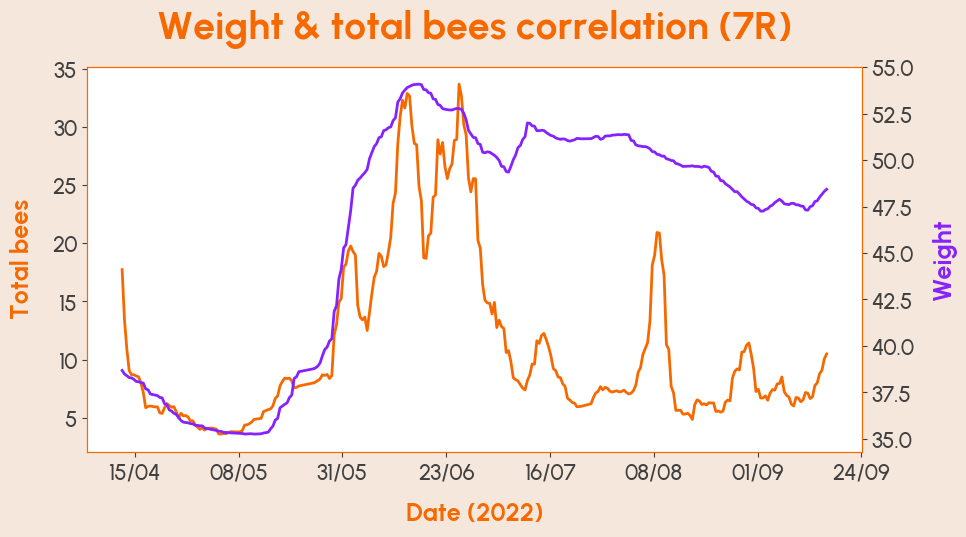

In [308]:
df_7r = pd.read_csv(os.path.join(PATH, "dataset_7R.csv"))
df_7r['day'] = pd.to_datetime(df_7r['day'], format='%Y-%m-%d')
df_7r['hour'] = pd.to_datetime(df_7r['hour'], format='%H')
df_7r['datetime'] = df_7r['day'] + df_7r['hour'].apply(lambda x: pd.Timedelta(hours=x.hour))
df_7r.dropna(inplace=True)
df_7r = df_7r[(df_7r['temp'] > 0) & (df_7r['humid'] > 0) & (df_7r['weight'] > 0) & (df_7r['file_size'] > 0) & (df_7r['workers_avg'] > 0) & (df_7r['drones_avg'] > 0) & (df_7r['total'] > 0) & (df_7r['ratio'] > 0)]
df_7r.reset_index(drop=True, inplace=True)
ma = 20
shift = 0 - int(ma / 2)
#add 5ma
df_7r['weight_ma'] = df_7r['weight'].rolling(ma).mean()
df_7r['weight_ma'] = df_7r['weight_ma'].shift(shift)
#add 5ma
df_7r['total_ma'] = df_7r['total'].rolling(ma).mean()
df_7r['total_ma'] = df_7r['total_ma'].shift(shift)

#add column unix
df_7r['unix'] = df_7r['datetime'].apply(lambda x: int(datetime.datetime.strptime(str(x),"%Y-%m-%d %H:%M:%S").timestamp()))
df_7r_no_nan = df_7r[['unix', 'total_ma', 'weight_ma']]
df_7r_no_nan.dropna(inplace=True)
x_7r = df_7r_no_nan['unix'].values
y_total_7r = df_7r_no_nan['total_ma'].values
y_file_size_7r = df_7r_no_nan['weight_ma'].values

fig, ax1 = plt.subplots(figsize=(10, 5))


x_new = np.linspace(df_7r_no_nan['unix'].min(), df_7r_no_nan['unix'].max(), 300)
spl = make_interp_spline(x_7r, y_total_7r, k=1)
y_smooth = spl(x_new)
ax1.plot(x_new, y_smooth, color='#F66900', linewidth=2)
ax1.xaxis.set_major_locator(plt.MaxNLocator(x_ticks_count))
ax1.set_xticklabels([pd.to_datetime(tm, unit='s').strftime('%d/%m') for tm in ax1.get_xticks()])
ax1.set_ylabel('Total bees', fontproperties=font_x, labelpad=12.0)


ax1.set_xlabel(ax1.get_xlabel(), fontproperties=font_xx, labelpad=12.0)
ax1.set_ylabel(ax1.get_ylabel(), fontproperties=font_xx, labelpad=12.0)
ax1.set_title(ax1.get_title(), fontproperties=font_xxx, pad=20.0)
ax1.xaxis.label.set_color(primary[mode])
ax1.yaxis.label.set_color('#F66900')
ax1.title.set_color(primary[mode])
ax1.set_xticklabels(ax1.get_xticklabels(), fontproperties=font_x)
ax1.set_yticklabels(ax1.get_yticklabels(), fontproperties=font_x)
ax1.tick_params(axis='x', colors=text[mode])
ax1.tick_params(axis='y', colors=text[mode])
fig.patch.set_facecolor(background[mode])
ax1.set_facecolor(foreground[mode])
ax1.spines['bottom'].set_color(primary[mode])
ax1.spines['left'].set_color(primary[mode])
ax1.spines['top'].set_color(primary[mode])
ax1.spines['right'].set_color(primary[mode])

ax2 = plt.twinx()
x_new = np.linspace(df_7r_no_nan['unix'].min(), df_7r_no_nan['unix'].max(), 300)
spl = make_interp_spline(x_7r, y_file_size_7r, k=1)
y_smooth = spl(x_new)
ax2.plot(x_new, y_smooth, color='#8622FF', linewidth=2)
ax2.xaxis.set_major_locator(plt.MaxNLocator(x_ticks_count))
ax2.set_xticklabels([pd.to_datetime(tm, unit='s').strftime('%d/%m') for tm in ax2.get_xticks()])
ax2.set_ylabel('Weight', fontproperties=font_x, labelpad=12.0)

ax2.set_xlabel(ax2.get_xlabel(), fontproperties=font_xx, labelpad=12.0)
ax2.set_ylabel(ax2.get_ylabel(), fontproperties=font_xx, labelpad=12.0)
ax2.set_title(ax2.get_title(), fontproperties=font_xxx, pad=20.0)
ax2.xaxis.label.set_color(primary[mode])
ax2.yaxis.label.set_color('#8622FF')
ax2.title.set_color(primary[mode])
ax2.set_xticklabels(ax2.get_xticklabels(), fontproperties=font_x)
ax2.set_yticklabels(ax2.get_yticklabels(), fontproperties=font_x)
ax2.tick_params(axis='x', colors=text[mode])
ax2.tick_params(axis='y', colors=text[mode])
fig.patch.set_facecolor(background[mode])
ax2.set_facecolor(foreground[mode])
ax2.spines['bottom'].set_color(primary[mode])
ax2.spines['left'].set_color(primary[mode])
ax2.spines['top'].set_color(primary[mode])
ax2.spines['right'].set_color(primary[mode])


#reset Y axis ticks
ax1.set_xlabel("Date (2022)")
plt.title("Weight & total bees correlation (7R)", fontproperties=font_xxx, pad=20.0)
plt.show()

#save image
fig.set_size_inches(10, 6)
fig.tight_layout()
fig.savefig("corr_weight_total.png", dpi=300)